In [3]:
import pandas as pd

In [4]:
data = '/Users/leona/OneDrive/Documentos/GitHub/Machine-Learning-Module-1-studies/regression/Admission_Predict_Ver1.1.csv'
df = pd.read_csv(data)
df.drop(columns='Serial No.', axis=1, inplace=True)

In [5]:
x = df.drop(columns='Chance of Admit', axis=1)
y = df['Chance of Admit']

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_depth = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11])
criterion = ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
grid_tests = {
    'min_samples_split': min_split,
    'max_depth': max_depth,
    'criterion': criterion
}

In [8]:
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator=model, param_grid=grid_tests, cv=5)
grid.fit(x, y)

print(f'The best score was: {grid.best_score_}. The best parameters was: {grid.best_params_}')

The best score was: 0.7746331223719187. The best parameters was: {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 6}


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [10]:
model_best = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, min_samples_split=3)
model_best.fit(x, y)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_split=3)

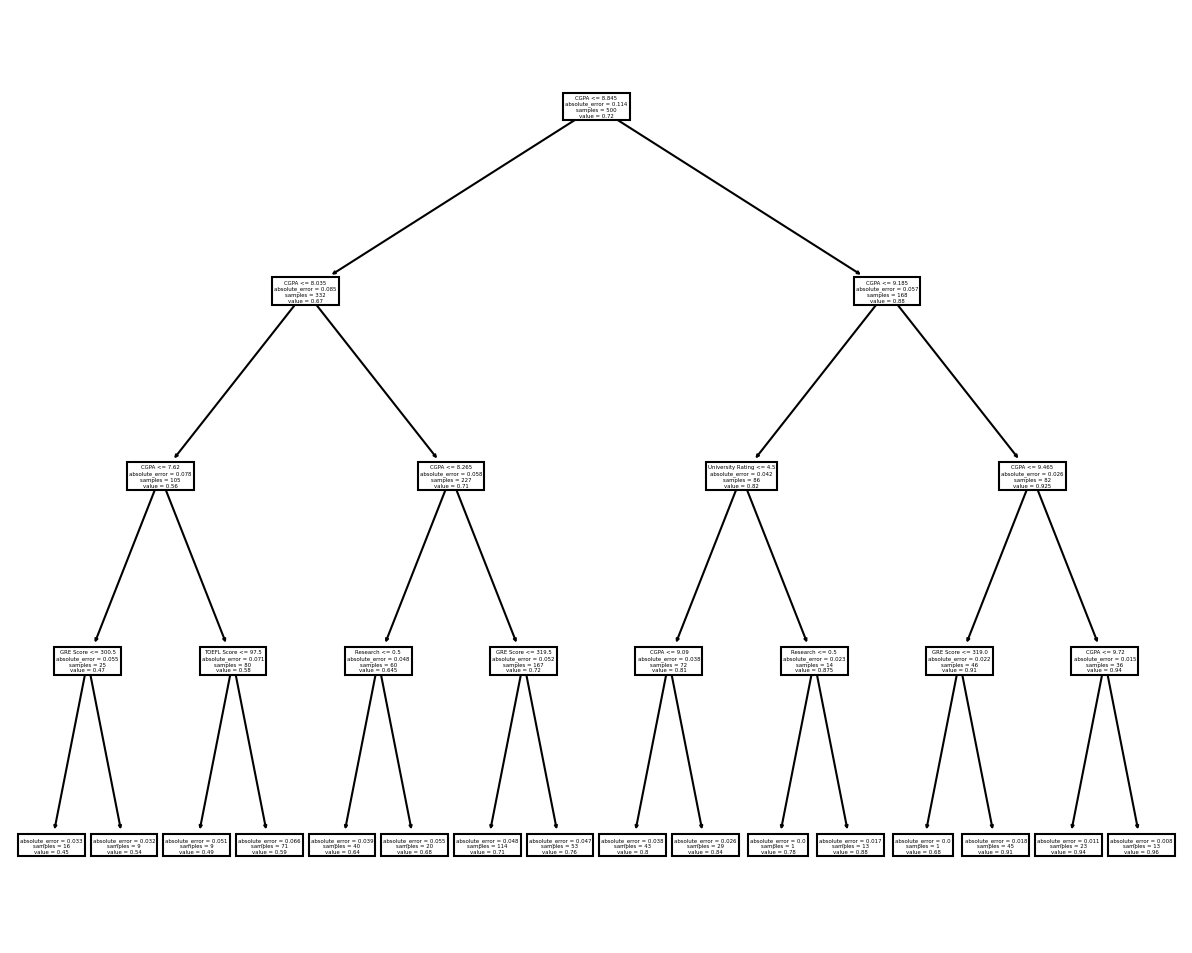

In [11]:
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(model_best, feature_names=x.columns)
plt.show()